+ 로지스틱 회귀 : 반응변수(y)가 범주형일 때 적용되는 회귀분석모형
  + 사후확률 : 이때 모형의 적합을 통해 추정된 확률
  + 특징(장점): y가 범주형인데 일반 회귀적합을 하면 (0 or 1 = -$\infty$ ~ $\infty$)의 양변의 구조적 문제가 발생하여 오류 → log(오즈)로 구조적 문제 해결 / 오증의 완점에서 해석될 수 있음
    + 회귀계수 $\beta_1$ 해석 : 나머지 변수가 주어질 때 $x_1$이 한 단위 증가할 때마다 $e^{오즈}$가 증가함
  + 목적 : 예측 + 분류
    + 분류 : $\pi(x)$가 기준값보다 크면 $Y=1$집단으로, 작으면 $Y=0$집단으로 분류
  + 형태
    1) $log(\frac {\pi(x)} {1 - \pi(x)}) = \alpha + \beta_1 x_1 + ... + \beta_k x_k$
    2) $\pi(x) = \frac {exp(\alpha + \beta_1 x_1 + ... + \beta_k x_k)} {1 + exp(\alpha + \beta_1 x_1 + ... + \beta_k x_k)}$
    3) = $ \frac {1} {exp{-(\alpha + \beta_1 x_1 + ... + \beta_k x_k)}}$
    4) $\frac {\pi(x)} {1 - \pi(x)} = e^{\alpha + \beta_1 x_1 + ... + \beta_k x_k}$
    
    + 위 식은 표준 로지스틱 분포의 누적분포함수(c.d.f)를 $F(x)$라고 할 때, $\pi(x) = F(\alpha + \beta_1 x_1 + ... + \beta_k x_k)$와 동일한 표현
      + 의미 : 표준 로지스틱 분포의 누적분포함수로 성공의 확률을 설명한다.

+ 프로빗모형 : 위 식에서 $F(*)$ 대신 표준정규분포의 누적함수 $\Phi(*)$로 성공의 확률을 모형화 한 것
  + 모형 : $\Phi(\pi(x)) = \alpha + \beta_1 x_1 + ... + \beta_k x_k$

### 예제 1.

In [1]:
data(iris)
a = subset(iris, Species == "setosa" | Species == "versicolor")
a$Species = factor(a$Species)
str(a)

'data.frame':	100 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 2 levels "setosa","versicolor": 1 1 1 1 1 1 1 1 1 1 ...


+ Species는 요인형 변수 : setosa(Y = 1), versicolor(Y = 2)
  + 이 자료를 로지스틱 회귀하면, 큰 숫자(Y = 2) versicolor 오즈를 모형화

In [2]:
b = glm(Species ~ Sepal.Length, data = a, family = binomial)
summary(b)


Call:
glm(formula = Species ~ Sepal.Length, family = binomial, data = a)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -27.831      5.434  -5.122 3.02e-07 ***
Sepal.Length    5.140      1.007   5.107 3.28e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  64.211  on 98  degrees of freedom
AIC: 68.211

Number of Fisher Scoring iterations: 6


+ Sepal.Length는 매우 유의한 변수
+ Sepal.Length가 한 단위 증가함에 따라 versicolor(Y = 2)일 오즈가 exp(5.14) = 170배 증가함
+ 이탈도 : Null - Residual = 74.4 정도, p-value = 0.997로 귀무가설 기각x, 잘 적합됨

In [3]:
coef(b)

(Intercept) Sepal.Length 
  -27.831451     5.140336

In [4]:
exp(coef(b)["Sepal.Length"])

Sepal.Length 
    170.7732

In [5]:
confint(b, parm = "Sepal.Length")

Waiting for profiling to be done...



2.5 %   97.5 % 
3.421613 7.415508

In [6]:
exp(confint(b, parm = "Sepal.Length"))

Waiting for profiling to be done...



2.5 %     97.5 % 
  30.61878 1661.55385

In [7]:
fitted(b)[c(1:5, 96:100)]  # p(y = 2) : versicolor 일 확률의 추정값

1          2          3          4          5         96         97 
0.16579367 0.06637193 0.02479825 0.01498061 0.10623680 0.81282396 0.81282396 
        98         99        100 
0.98268360 0.16579367 0.81282396

In [8]:
predict(b, newdata = a[c(1, 50, 51, 100), ], type = "response")

1        50        51       100 
0.1657937 0.1062368 0.9997116 0.8128240

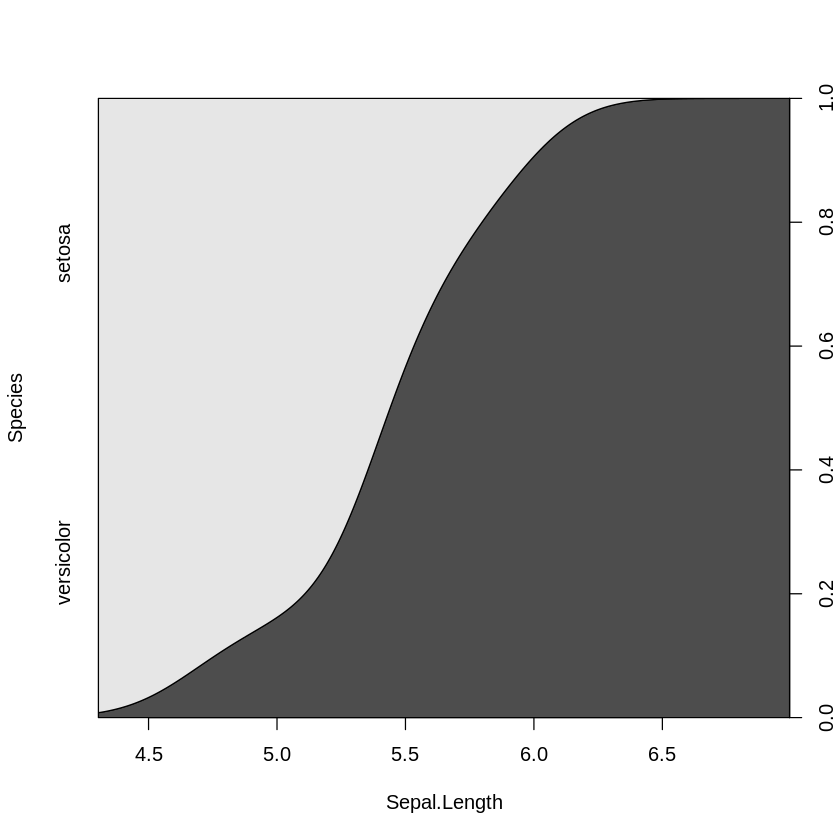

In [9]:
cdplot(Species ~ Sepal.Length, data = a)

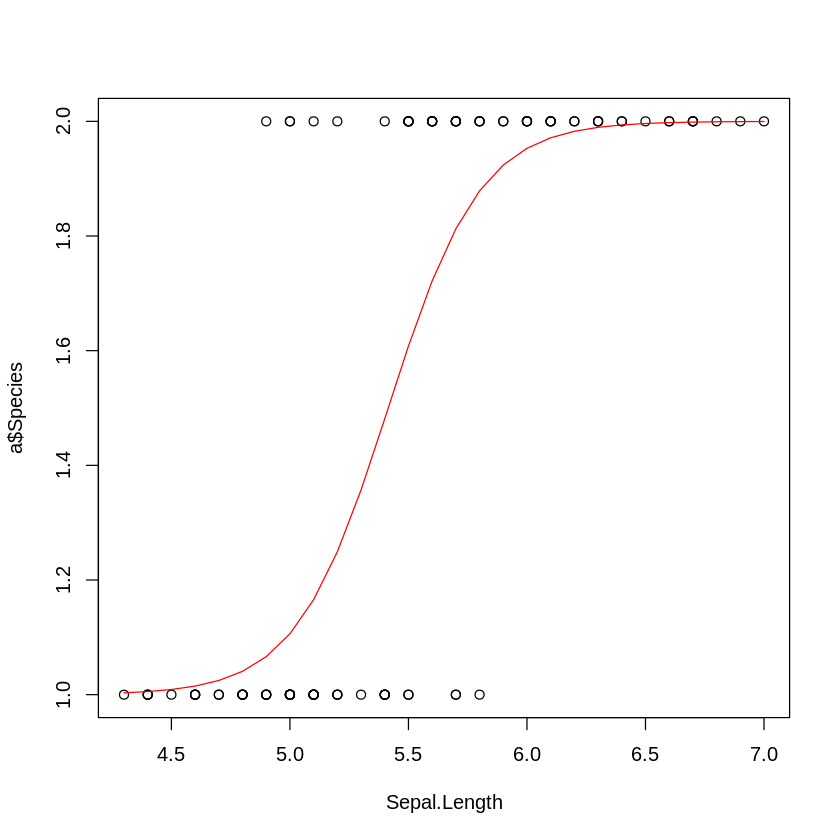

In [10]:
plot(a$Sepal.Length, a$Species, xlab = "Sepal.Length")
x = seq(min(a$Sepal.Length), max(a$Sepal.Length), 0.1)
lines(x, 1 + (1 / (1 + (1 / exp(-27.831 + 5.140 * x)))), type = "l", col = "red")

+ Sepal.Length가 커짐에 따라 versicolor의 확률이 증가함

### 예제 2.

In [12]:
attach(mtcars)
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [13]:
glm.vs = glm(vs ~ mpg + am, data = mtcars, family = binomial)
summary(glm.vs)


Call:
glm(formula = vs ~ mpg + am, family = binomial, data = mtcars)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am           -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


+ 반응변수 : vs(0 : flat engine, 1 : straight engine)
+ mpg 값이 한 단위 증가함에 따라 vs가 1일 오즈가 exp(0.6809) = 1.98배 증가함
+ mpg가 주어질 때 오즈에 대한 am의 효과는 exp(-3.0073) = 0.05배, 즉 변속기가 수동인 경우 자동에 비해 vs = 1의 오즈가 95% 감소

In [14]:
step.vs = step(glm.vs, direction = "backward")
summary(step.vs)

Start:  AIC=26.65
vs ~ mpg + am

       Df Deviance    AIC
<none>      20.646 26.646
- am    1   25.533 29.533
- mpg   1   42.953 46.953



Call:
glm(formula = vs ~ mpg + am, family = binomial, data = mtcars)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -12.7051     4.6252  -2.747  0.00602 **
mpg           0.6809     0.2524   2.698  0.00697 **
am           -3.0073     1.5995  -1.880  0.06009 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.860  on 31  degrees of freedom
Residual deviance: 20.646  on 29  degrees of freedom
AIC: 26.646

Number of Fisher Scoring iterations: 6


In [15]:
ls(glm.vs)

[1] "aic"               "boundary"          "call"             
 [4] "coefficients"      "contrasts"         "control"          
 [7] "converged"         "data"              "deviance"         
[10] "df.null"           "df.residual"       "effects"          
[13] "family"            "fitted.values"     "formula"          
[16] "iter"              "linear.predictors" "method"           
[19] "model"             "null.deviance"     "offset"           
[22] "prior.weights"     "qr"                "R"                
[25] "rank"              "residuals"         "terms"            
[28] "weights"           "xlevels"           "y"

In [16]:
str(glm.vs)

List of 30
 $ coefficients     : Named num [1:3] -12.705 0.681 -3.007
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "mpg" "am"
 $ residuals        : Named num [1:32] -1.24 -1.24 2.21 1.15 -2.03 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ fitted.values    : Named num [1:32] 0.196 0.196 0.453 0.866 0.507 ...
  ..- attr(*, "names")= chr [1:32] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ effects          : Named num [1:32] 0.726 -1.939 1.88 0.932 -0.658 ...
  ..- attr(*, "names")= chr [1:32] "(Intercept)" "mpg" "am" "" ...
 $ R                : num [1:3, 1:3] -1.8 0 0 -35.07 -5.29 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "(Intercept)" "mpg" "am"
  .. ..$ : chr [1:3] "(Intercept)" "mpg" "am"
 $ rank             : int 3
 $ qr               :List of 5
  ..$ qr   : num [1:32, 1:3] -1.804 0.22 0.276 0.189 0.277 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:32] "Mazda RX4" "Ma

In [17]:
anova(glm.vs, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,31,43.86011,NA
mpg,1,18.326774,30,25.53334,1.860736e-05
am,1,4.887042,29,20.64629,2.705900e-02


In [18]:
1 - pchisq(18.327, 1)
1 - pchisq(4.887, 1)

[1] 1.860515e-05

[1] 0.02705967

#### 참고. 일반화선형모형(GLM)에서의 이탈도
+ 포화모형 : 추저해야 할 모수의 수가 데이터의 수와 동일한 모형
+ 영모형 : 절편항만 가지는 모형으로 추정할 모수가 1개
+ 제안모형 : (p개의 모수 + 절편항)을 포함하는 모형으로 추정할 모수가 (p+1)개
+ 이탈도(Null and Residual)는 값이 작을수록 해당모형이 자료를 작 적합함을 의미

#### 참고. 다중회귀에서의 변수선택법
+ 전진선택법 : 가장 작은 모형에서 반응변수에 가장 큰 영향을 주는 설명변수를 차례로 모형에 포함시키되 더 이상 의미 있는 변수가 없을 때 중단하는 방법
+ 후진제거법 : 모든 설명변수를 포함하는 모형에서 기여도가 낮은 변수를 차례로 제거해 나가되 더 이상 제거할 변수가 없을 때 중단하는 방법
+ 단계별 선택법 : 먼저 선택된 변수도 다음 단계에서 제거될 수 있도록 변수선택의 단계마다 체크해나가는 방법